In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns

In [2]:
import re


def load_data_from_folders(path_to_dir: pathlib.Path) -> pd.DataFrame:
    records = []
    for model_path in path_to_dir.iterdir():
        if model_path.is_dir():
            model_name = model_path.name
            for dset_folder in model_path.iterdir():
                if dset_folder.is_dir():
                    dataset_name = dset_folder.name
                    for exp_folder in dset_folder.iterdir():
                        if exp_folder.is_dir():
                            match = re.match(r"(.+?)_neg(\d+)_seed(\d+)", exp_folder.name)
                            if match:
                                prompt_name, neg_value, seed_value = match.groups()
                                avg_file = exp_folder / 'averages.json'
                                if avg_file.exists():
                                    with open(avg_file, 'r') as f:
                                        avg_data = json.load(f)
                                        records.append({**avg_data, **{'model': model_name, 'dataset': dataset_name, 'prompt': prompt_name, 'negatives': int(neg_value), 'seed': int(seed_value)}})
    return pd.DataFrame(records)

In [5]:
path_to_dir = pathlib.Path("~/research/remote_data/").expanduser()
# paths = [path_to_dir/"DeepSeek-R1-Distill-Llama-70B", path_to_dir/"Llama-3.3-70B-Instruct"]
df = load_data_from_folders(path_to_dir)
df = df[df["prompt"].isin(["icdcm1_reas", "icdcm1_struct", "icdcm2_reas", "icdcm2_struct", "icdcm4_reas", "icdcm4_struct"])]
df.head(10)

,f1_micro,f1_macro,accuracy,prediction-bias-ratio,model,dataset,prompt,negatives,seed
0,0.474390,0.223924,0.079137,1.100303,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm2_reas,100,1
1,0.658816,0.380828,0.134892,0.904242,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm2_reas,40,1
2,0.529595,0.256713,0.086331,1.042727,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm2_reas,80,1
3,0.127911,0.042206,0.000000,2.643636,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm4_struct,100,1
6,0.933290,0.843003,0.616906,0.875493,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm2_reas,0,1
7,0.119576,0.043865,0.000000,2.603636,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm2_struct,100,1
10,0.092196,0.030456,0.000000,3.345151,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm1_struct,100,1
11,0.572781,0.298969,0.107914,0.983939,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm2_reas,60,1
16,0.777601,0.532663,0.187050,0.904848,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm2_reas,20,1
17,0.332698,0.117225,0.019784,0.907273,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,icdcm1_reas,100,1


In [6]:
df["prompt_type"] = df["prompt"].apply(lambda x: x.split("_")[1])
df['prompt'] = df['prompt'].map(
    {'icdcm1_reas': "codes", 
     'icdcm1_struct': "codes",
     'icdcm2_reas': "codes+descriptions", 
     'icdcm2_struct': "codes+descriptions",
     'icdcm4_reas': "codes+descriptions+guidelines", 
     'icdcm4_struct': "codes+descriptions+guidelines",})
df.head(10)

,f1_micro,f1_macro,accuracy,prediction-bias-ratio,model,dataset,prompt,negatives,seed,prompt_type
0,0.474390,0.223924,0.079137,1.100303,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions,100,1,reas
1,0.658816,0.380828,0.134892,0.904242,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions,40,1,reas
2,0.529595,0.256713,0.086331,1.042727,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions,80,1,reas
3,0.127911,0.042206,0.000000,2.643636,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions+guidelines,100,1,struct
6,0.933290,0.843003,0.616906,0.875493,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions,0,1,reas
7,0.119576,0.043865,0.000000,2.603636,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions,100,1,struct
10,0.092196,0.030456,0.000000,3.345151,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes,100,1,struct
11,0.572781,0.298969,0.107914,0.983939,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions,60,1,reas
16,0.777601,0.532663,0.187050,0.904848,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes+descriptions,20,1,reas
17,0.332698,0.117225,0.019784,0.907273,DeepSeek-R1-Distill-Llama-70B,mdace-icd10cm,codes,100,1,reas


In [7]:
def plot_metric_over_negatives(ax: plt.Axes, df: pd.DataFrame, metric: str, title: str) -> None:
    # Set a color palette for better readability
    palette = sns.color_palette()
    
    # Aggregating the data to calculate mean, min, and max for the specified metric
    agg_df = df.groupby(['prompt', 'negatives'])[metric].agg(['mean', 'min', 'max']).reset_index()

    # Plotting the line chart with shaded areas
    for i, exp in enumerate(agg_df['prompt'].unique()):
        subset = agg_df[agg_df['prompt'] == exp]
        ax.plot(subset['negatives'], subset['mean'], label=exp, marker='o', color=palette[i])
        ax.fill_between(subset['negatives'], subset['min'], subset['max'], alpha=0.2, color=palette[i])

    # Labeling the plot
    ax.set_xlabel('Number of Candidate Codes')
    ax.set_ylabel(f'Metric: {metric}')
    ax.set_title(title)
    ax.grid(True)


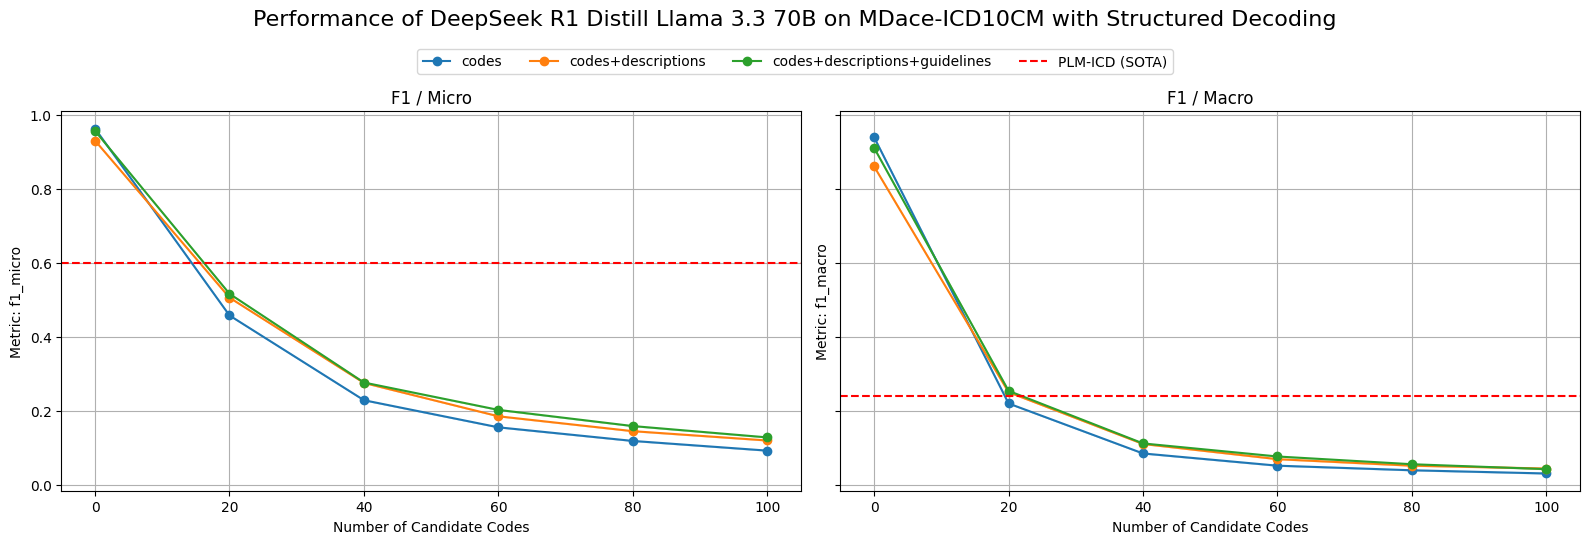

In [9]:
# Create subplots
title = "Performance of DeepSeek R1 Distill Llama 3.3 70B on MDace-ICD10CM with Structured Decoding"
subtitle = ["F1 / Micro", "F1 / Macro"]
metrics = ["f1_micro", "f1_macro"]
baselines = [("PLM-ICD (SOTA)", 0.60), ("PLM-ICD (SOTA)", 0.24)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# To store handles and labels for the shared legend
handles, labels = [], []

# Plot each metric on a separate subplot
plot_df = df[(df["model"] == "DeepSeek-R1-Distill-Llama-70B") & (df["prompt_type"] == "struct")]
for idx, (ax, metric) in enumerate(zip(axes, metrics)):
    plot_metric_over_negatives(ax, plot_df, metric, subtitle[idx])

    # Collect legend elements only for the second subplot
    label, value = baselines[idx]
    ax.axhline(y=value, color='red', linestyle='--', linewidth=1.5, label=label)
    if idx == 1:  # Skip legend for the first axis
        ax_handles, ax_labels = ax.get_legend_handles_labels()
        handles.extend(ax_handles)
        labels.extend(ax_labels)

# Add the shared legend inside the plot area
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.83), ncol=4, fontsize=10, frameon=True)

# Add the figure title
fig.suptitle(title, fontsize=16, y=0.95)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.05, 1, 0.9])  # Leave space for the legend and title
plt.show()

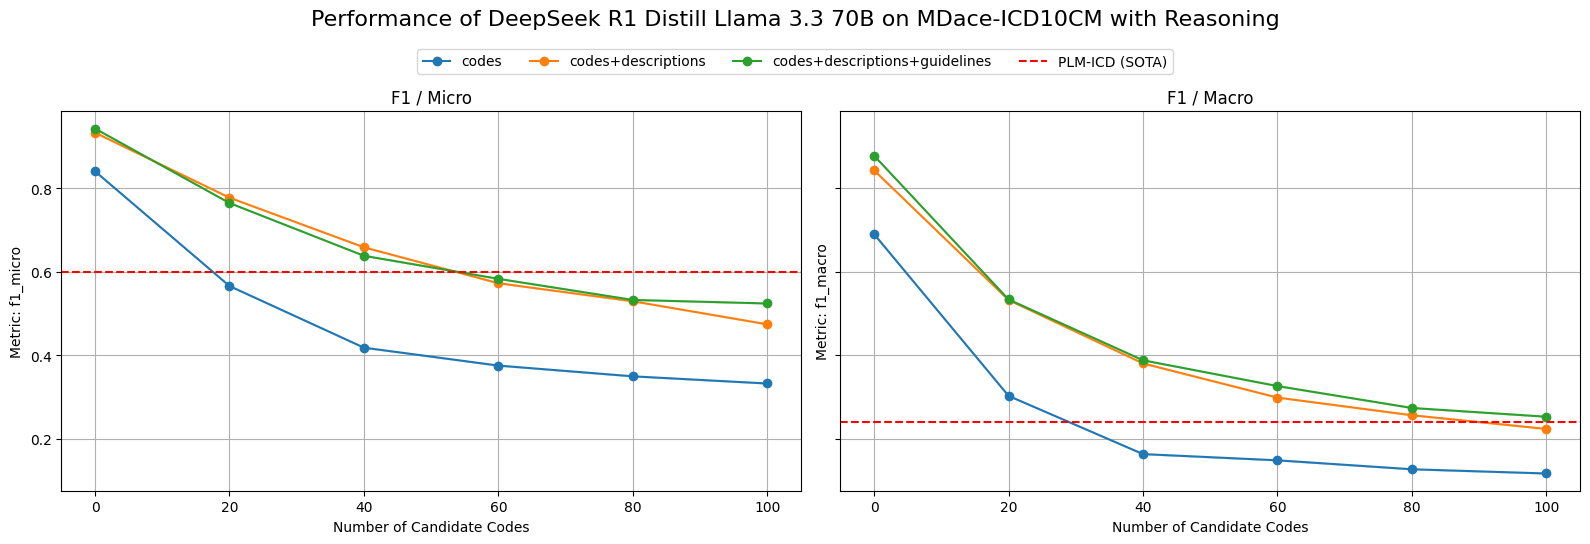

In [10]:
# Create subplots
title = "Performance of DeepSeek R1 Distill Llama 3.3 70B on MDace-ICD10CM with Reasoning"
subtitle = ["F1 / Micro", "F1 / Macro"]
metrics = ["f1_micro", "f1_macro"]
baselines = [("PLM-ICD (SOTA)", 0.60), ("PLM-ICD (SOTA)", 0.24)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# To store handles and labels for the shared legend
handles, labels = [], []

# Plot each metric on a separate subplot
plot_df = df[(df["model"] == "DeepSeek-R1-Distill-Llama-70B") & (df["prompt_type"] == "reas")]
for idx, (ax, metric) in enumerate(zip(axes, metrics)):
    plot_metric_over_negatives(ax, plot_df, metric, subtitle[idx])

    # Collect legend elements only for the second subplot
    label, value = baselines[idx]
    ax.axhline(y=value, color='red', linestyle='--', linewidth=1.5, label=label)
    if idx == 1:  # Skip legend for the first axis
        ax_handles, ax_labels = ax.get_legend_handles_labels()
        handles.extend(ax_handles)
        labels.extend(ax_labels)

# Add the shared legend inside the plot area
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.83), ncol=4, fontsize=10, frameon=True)

# Add the figure title
fig.suptitle(title, fontsize=16, y=0.95)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.05, 1, 0.9])  # Leave space for the legend and title
plt.show()

In [12]:
def plot_shot_metrics(df: pd.DataFrame, metric: str) -> None:
    # Set a color palette for better readability
    palette = sns.color_palette("Set1")
    # Aggregating the data to calculate mean, min, and max for the specified metric
    agg_df = df.groupby(['shots', 'experiment'])[metric].agg(['mean', 'min', 'max']).reset_index()

    # Plotting the line chart with shaded areas
    plt.figure(figsize=(12, 8))
    for i, exp in enumerate(agg_df['experiment'].unique()):
        subset = agg_df[agg_df['experiment'] == exp]
        plt.plot(subset['shots'], subset['mean'], label=exp, color=palette[i])
        plt.fill_between(subset['shots'], subset['min'], subset['max'], alpha=0.2, color=palette[i])

    # Labeling the plot
    plt.xlabel('Number of Shots')
    plt.ylabel(f'Metric: {metric}')
    plt.title(f'{metric} across different number of shots (Llama 70B Instruct)')
    plt.legend(title='Experiments')
    plt.grid(True)
    plt.show()

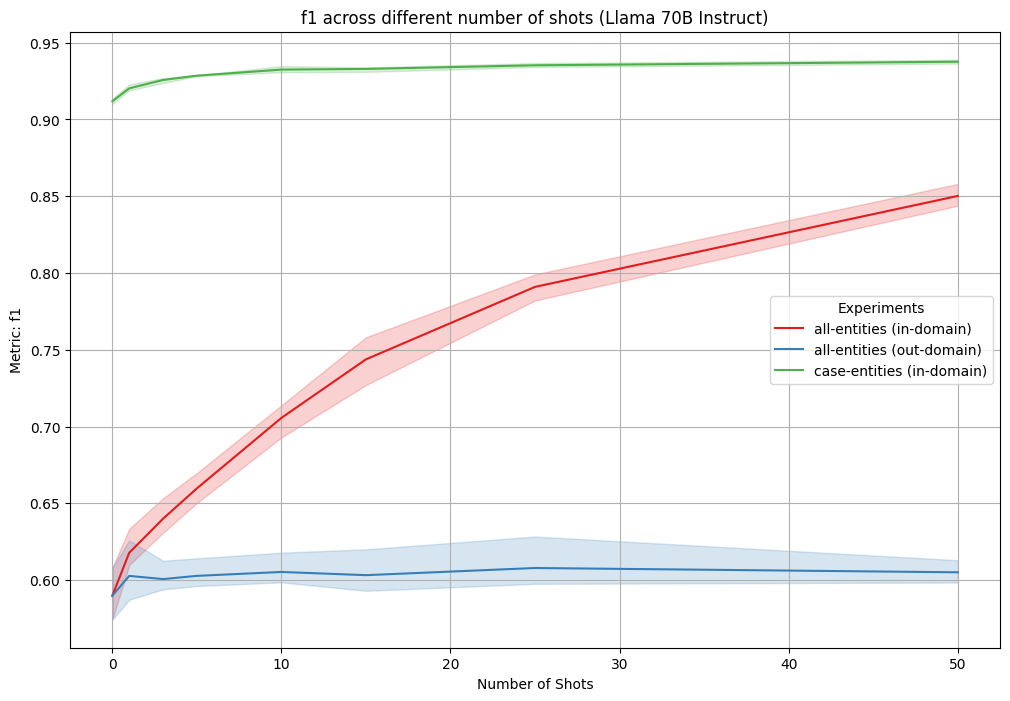

In [30]:
plot_shot_metrics(df, 'f1')

In [49]:
path_to_dir = pathlib.Path("~/research/remote-data/").expanduser()
paths = [path_to_dir/"zero-shot-negative-sampling"]
df = load_data_from_folders(paths, 'negatives')
df["f1"] = 2 * (df["precision"] * df["recall"]) / (df["precision"] + df["recall"])

In [50]:
df

,experiment,negatives,seed,recall,precision,exact_match,positive_ratio,negative_ratio,f1
0,zero-shot-negative-sampling,0,seed1,0.933967,0.913633,0.837233,0.954467,0.958633,0.923688
1,zero-shot-negative-sampling,0,seed2,0.943733,0.906633,0.831367,0.967033,0.952533,0.924811
2,zero-shot-negative-sampling,0,seed3,0.948800,0.888767,0.826733,0.998433,0.952433,0.917803
3,zero-shot-negative-sampling,100,seed1,0.849633,0.514867,0.573867,1.106267,0.778233,0.641184
4,zero-shot-negative-sampling,100,seed2,0.846233,0.520233,0.586767,1.067033,0.825267,0.644346
5,zero-shot-negative-sampling,100,seed3,0.826933,0.523400,0.610833,0.959833,0.857600,0.641052
6,zero-shot-negative-sampling,10,seed1,0.939367,0.806000,0.772433,1.007700,0.927300,0.867588
7,zero-shot-negative-sampling,10,seed2,0.918300,0.824000,0.772033,0.982000,0.925933,0.868598
8,zero-shot-negative-sampling,10,seed3,0.933133,0.805833,0.755933,1.021033,0.893267,0.864824
9,zero-shot-negative-sampling,25,seed1,0.896200,0.701200,0.685600,1.026800,0.866233,0.786798


In [43]:
def plot_negatives_metrics(df: pd.DataFrame, metric: str) -> plt:
    # Set a color palette for better readability
    palette = sns.color_palette("Set1")
    # Aggregating the data to calculate mean, min, and max for the specified metric
    agg_df = df.groupby(['negatives', 'experiment'])[metric].agg(['mean', 'min', 'max']).reset_index()

    # Plotting the line chart with shaded areas
    plt.figure(figsize=(12, 8))
    for i, exp in enumerate(agg_df['experiment'].unique()):
        subset = agg_df[agg_df['experiment'] == exp]
        plt.plot(subset['negatives'], subset['mean'], label=exp, marker='o', color=palette[i])
        plt.fill_between(subset['negatives'], subset['min'], subset['max'], alpha=0.2, color=palette[i])

    # Labeling the plot
    plt.xlabel('Number of Negatives')
    plt.ylabel(f'Metric: {metric}')
    plt.title(f'{metric} with increasing number of sampled negatives (Llama 70B Instruct)')
    plt.legend(title='Experiments')
    plt.grid(True)
    return plt

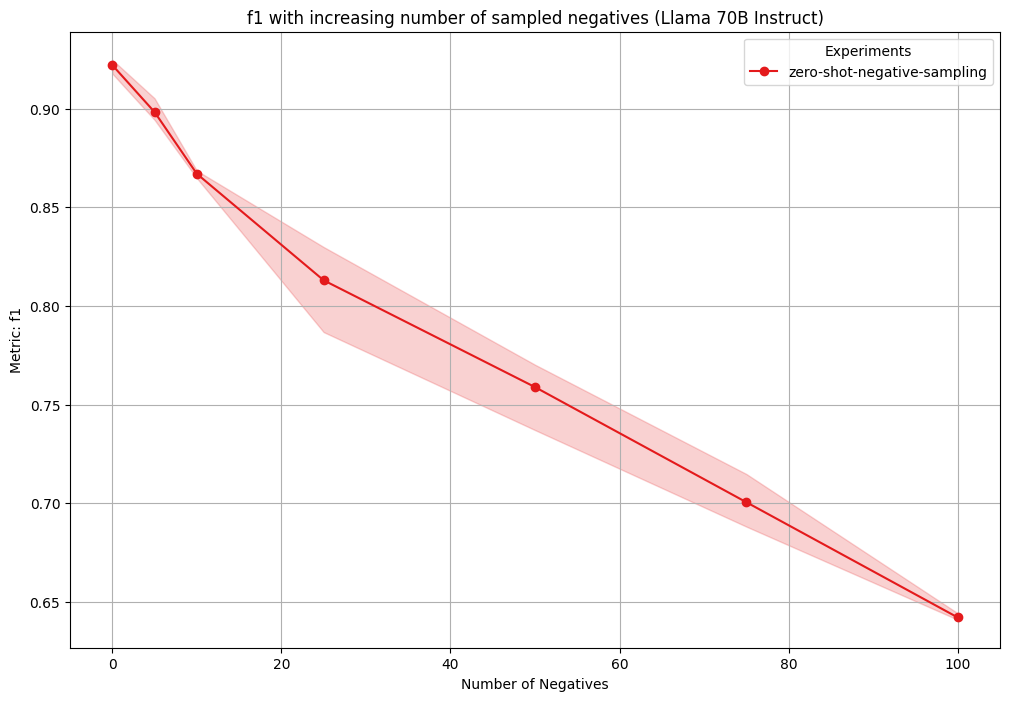

In [51]:
plot_negatives_metrics(df, 'f1')

In [44]:
def load_data_from_folders(paths: list[str], subfolder_key: str) -> pd.DataFrame:
    records = []
    for path in paths:
        main_folder = pathlib.Path(path).parent.name
        for subfolder in sorted(os.listdir(path)):
            subfolder_path = os.path.join(path, subfolder)
            if os.path.isdir(subfolder_path):
                value = int(subfolder.replace(subfolder_key, ''))
                for seed_folder in sorted(os.listdir(subfolder_path)):
                    seed_path = os.path.join(subfolder_path, seed_folder)
                    avg_file = os.path.join(seed_path, 'averages.json')
                    if os.path.exists(avg_file):
                        with open(avg_file, 'r') as f:
                            avg_data = json.load(f)
                            record = {'experiment': main_folder, subfolder_key: value, 'seed': seed_folder}
                            record.update(avg_data)
                            records.append(record)
    return pd.DataFrame(records)

In [45]:
path_to_dir = pathlib.Path("~/research/remote_data/unconstrained-code-description/4f3f78891df3881eacb94d9fdd1e183f").expanduser()
paths = [path_to_dir/f"mdace-diagnosis-{idx}/0shots" for idx in range(3, 8)]
df = load_data_from_folders(paths, 'negatives')
df["f1"] = 2 * (df["precision"] * df["recall"]) / (df["precision"] + df["recall"])

<module 'matplotlib.pyplot' from '/Users/amo/Library/Caches/pypoetry/virtualenvs/entityseeker-61_gtUVj-py3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

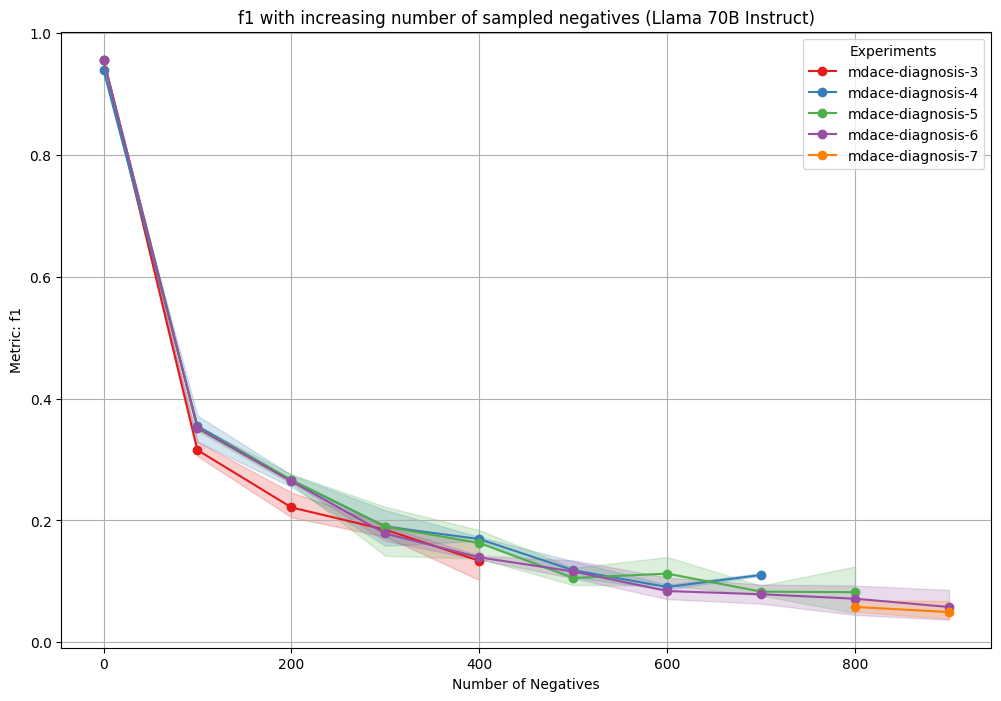

In [46]:
plot_negatives_metrics(df, 'f1')

In [47]:
path_to_dir = pathlib.Path("~/research/remote_data/constrained-code-description/380bbf28376f46f5db9b1b14bdf7bcce").expanduser()
paths = [path_to_dir/f"mdace-diagnosis-{idx}/0shots" for idx in range(3, 8)]
df = load_data_from_folders(paths, 'negatives')
df["f1"] = 2 * (df["precision"] * df["recall"]) / (df["precision"] + df["recall"])

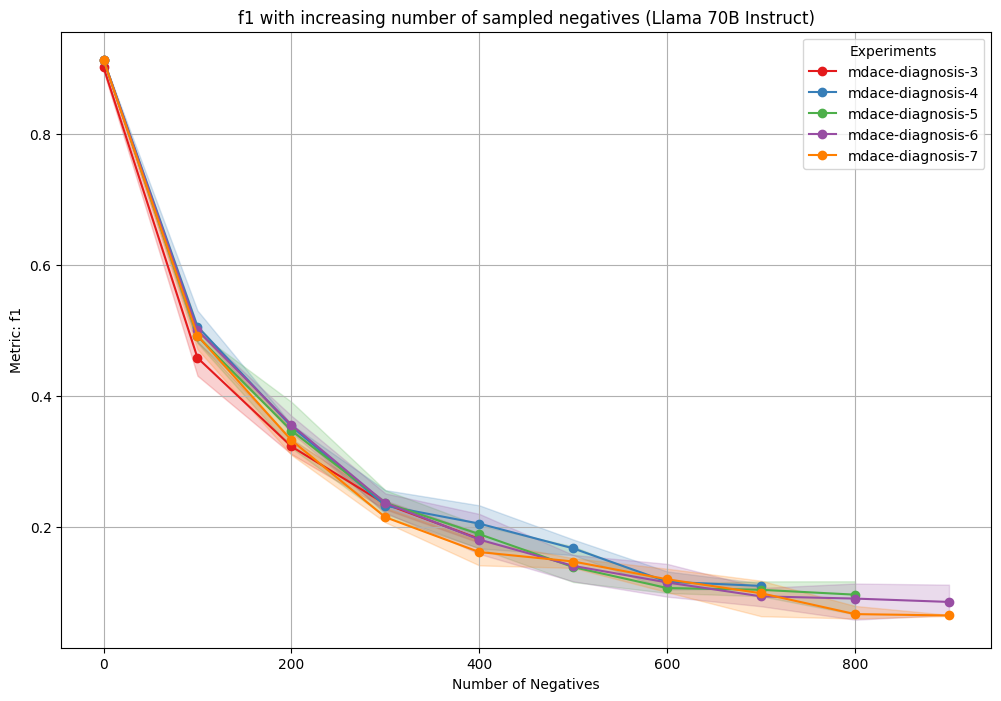

In [48]:
plot = plot_negatives_metrics(df, 'f1')
plot.show()

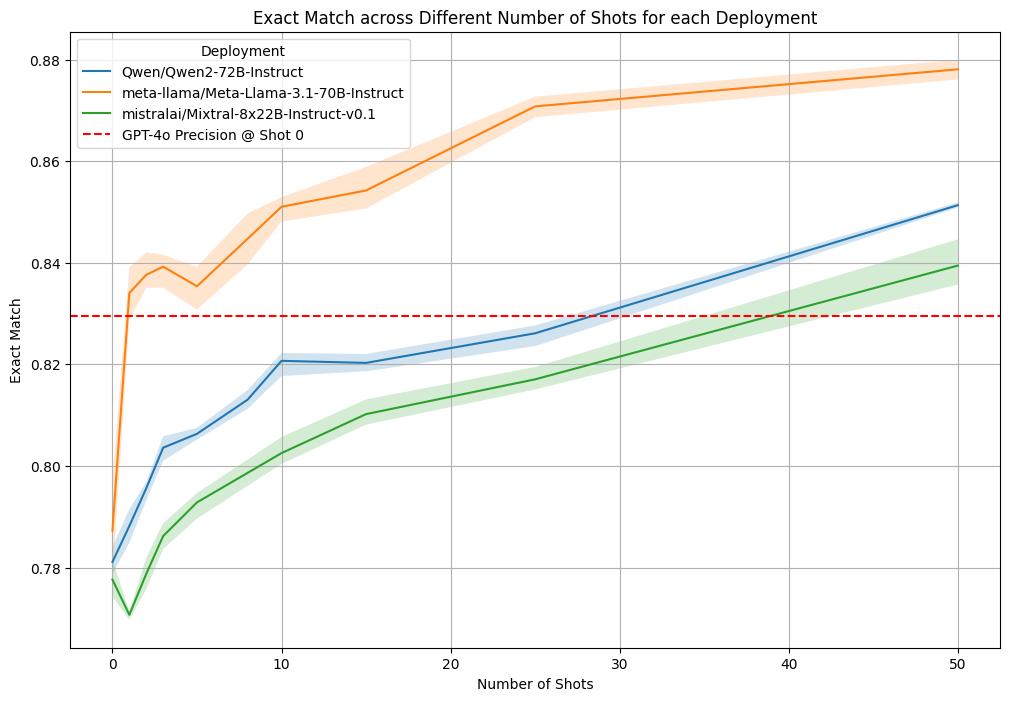

In [28]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.8296, color='red', linestyle='--', label='GPT-4o @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Exact Match')
plt.title('Exact Match across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

In [62]:
rename_dict = {
    "mdace-diagnosis-3": "icd10cm 3",
    "mdace-diagnosis-4": "icd10cm 3.1",
    "mdace-diagnosis-5": "icd10cm 3.2",
    "mdace-diagnosis-6": "icd10cm 3.3",
    "mdace-diagnosis-7": "icd10cm 3.4"
}

def plot_negatives_metrics(ax: plt.Axes, df: pd.DataFrame, metric: str, title: str) -> None:
    # Set a color palette for better readability
    palette = sns.color_palette("Set1")
    # Aggregating the data to calculate mean, min, and max for the specified metric
    agg_df = df.groupby(['negatives', 'experiment'])[metric].agg(['mean', 'min', 'max']).reset_index()

    # Plotting the line chart with shaded areas
    for i, exp in enumerate(agg_df['experiment'].unique()):
        subset = agg_df[agg_df['experiment'] == exp]
        label = rename_dict.get(exp, exp)
        ax.plot(subset['negatives'], subset['mean'], label=label, marker='o', color=palette[i], )
        ax.fill_between(subset['negatives'], subset['min'], subset['max'], alpha=0.2, color=palette[i])

    # Labeling the plot
    ax.set_xlabel('Number of Negatives')
    ax.set_ylabel(f'Metric: {metric}')
    ax.set_title(title)
    ax.legend(title='Experiments')
    ax.grid(True)

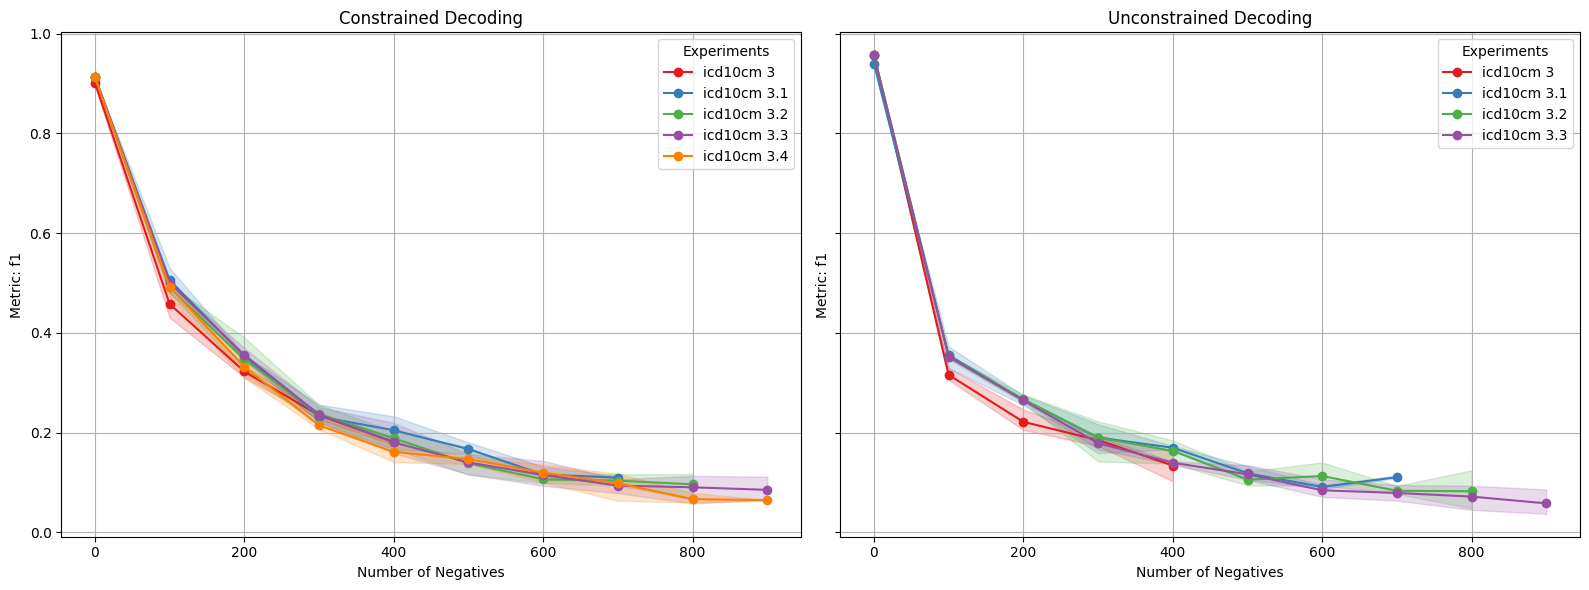

In [63]:
# Create subplots
titles = ["Constrained Decoding", "Unconstrained Decoding"]

path_to_dir = pathlib.Path("~/research/remote_data/constrained-code-description/380bbf28376f46f5db9b1b14bdf7bcce").expanduser()
paths = [path_to_dir/f"mdace-diagnosis-{idx}/0shots" for idx in range(3, 8)]
df1 = load_data_from_folders(paths, 'negatives')
df1["f1"] = 2 * (df1["precision"] * df1["recall"]) / (df1["precision"] + df1["recall"])

path_to_dir = pathlib.Path("~/research/remote_data/unconstrained-code-description/4f3f78891df3881eacb94d9fdd1e183f").expanduser()
paths = [path_to_dir/f"mdace-diagnosis-{idx}/0shots" for idx in range(3, 7)]
df2 = load_data_from_folders(paths, 'negatives')
df2["f1"] = 2 * (df["precision"] * df2["recall"]) / (df2["precision"] + df2["recall"])

dfs = [df1, df2]
fig, axes = plt.subplots(1, len(dfs), figsize=(16, 6), sharey=True)

# Plot each metric on a separate subplot
for idx, (ax, df) in enumerate(zip(axes, dfs)):
    plot_negatives_metrics(ax, df, "f1", titles[idx])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

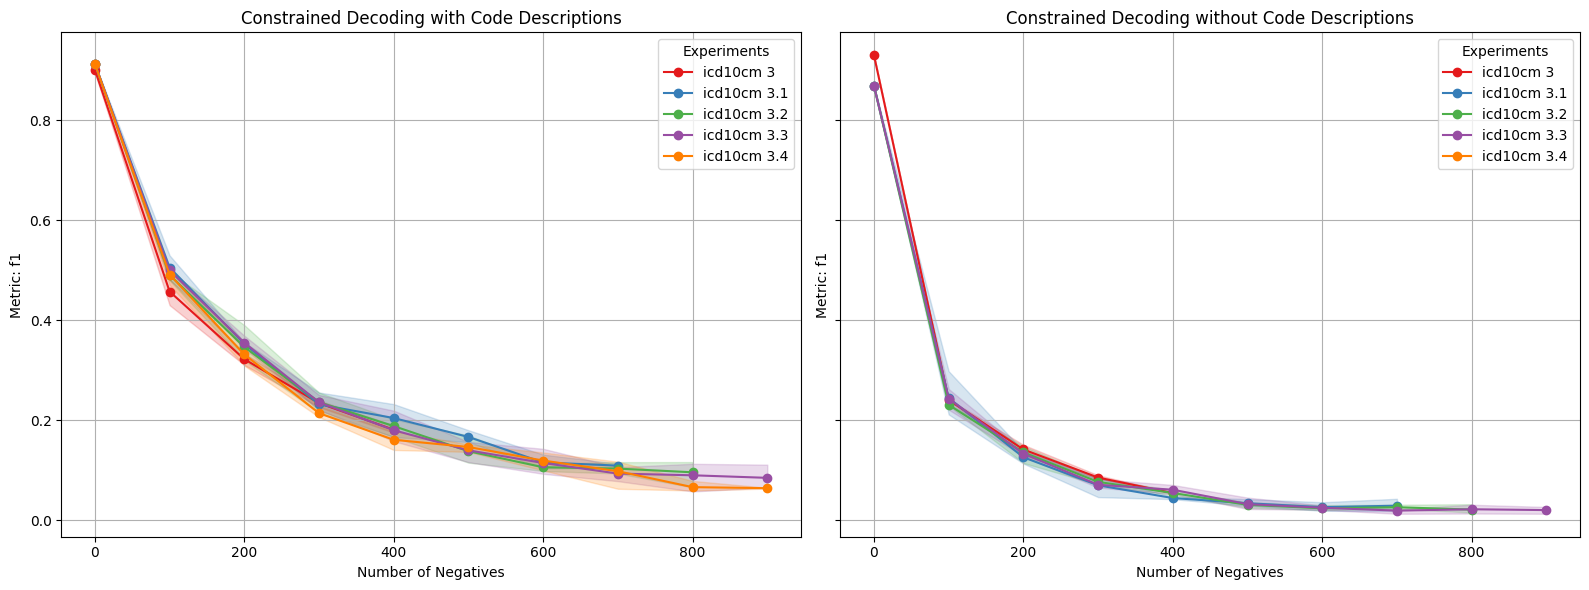

In [65]:
# Create subplots
titles = ["Constrained Decoding with Code Descriptions", "Constrained Decoding without Code Descriptions"]

path_to_dir = pathlib.Path("~/research/remote_data/constrained-code-description/380bbf28376f46f5db9b1b14bdf7bcce").expanduser()
paths = [path_to_dir/f"mdace-diagnosis-{idx}/0shots" for idx in range(3, 8)]
df1 = load_data_from_folders(paths, 'negatives')
df1["f1"] = 2 * (df1["precision"] * df1["recall"]) / (df1["precision"] + df1["recall"])

path_to_dir = pathlib.Path("~/research/remote_data/constrained-code-no-description/edf6625ce2ba58a39dcce00c8ec753dd").expanduser()
paths = [path_to_dir/f"mdace-diagnosis-{idx}/0shots" for idx in range(3, 8)]
df2 = load_data_from_folders(paths, 'negatives')
df2["f1"] = 2 * (df["precision"] * df2["recall"]) / (df2["precision"] + df2["recall"])

dfs = [df1, df2]
fig, axes = plt.subplots(1, len(dfs), figsize=(16, 6), sharey=True)

# Plot each metric on a separate subplot
for idx, (ax, df) in enumerate(zip(axes, dfs)):
    plot_negatives_metrics(ax, df, "f1", titles[idx])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()